# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Data

In [112]:
#Loading the dataset
df=pd.read_csv('/Users/vinayjuluri/Downloads/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


In [70]:
pd.options.display.float_format = '{:.2f}'.format

print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31        2.57   
1         1  12-02-2010    1641957.44             1        38.51        2.55   
2         1  19-02-2010    1611968.17             0        39.93        2.51   
3         1  26-02-2010    1409727.59             0        46.63        2.56   
4         1  05-03-2010    1554806.68             0        46.50        2.62   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88        4.00   
6431     45  05-10-2012     733455.07             0        64.89        3.98   
6432     45  12-10-2012     734464.36             0        54.47        4.00   
6433     45  19-10-2012     718125.53             0        56.47        3.97   
6434     45  26-10-2012     760281.43             0        58.85        3.88   

        CPI  Unemployment  
0    211.10

# Explore the Data

In [72]:
# Display the first few rows
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31        2.57   
1      1  12-02-2010    1641957.44             1        38.51        2.55   
2      1  19-02-2010    1611968.17             0        39.93        2.51   
3      1  26-02-2010    1409727.59             0        46.63        2.56   
4      1  05-03-2010    1554806.68             0        46.50        2.62   

     CPI  Unemployment  
0 211.10          8.11  
1 211.24          8.11  
2 211.29          8.11  
3 211.32          8.11  
4 211.35          8.11  


In [74]:
# Get basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [76]:
print(df.describe())

        Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price     CPI  \
count 6435.00       6435.00       6435.00      6435.00     6435.00 6435.00   
mean    23.00    1046964.88          0.07        60.66        3.36  171.58   
std     12.99     564366.62          0.26        18.44        0.46   39.36   
min      1.00     209986.25          0.00        -2.06        2.47  126.06   
25%     12.00     553350.10          0.00        47.46        2.93  131.74   
50%     23.00     960746.04          0.00        62.67        3.44  182.62   
75%     34.00    1420158.66          0.00        74.94        3.73  212.74   
max     45.00    3818686.45          1.00       100.14        4.47  227.23   

       Unemployment  
count       6435.00  
mean           8.00  
std            1.88  
min            3.88  
25%            6.89  
50%            7.87  
75%            8.62  
max           14.31  


# Data Cleaning

In [78]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [80]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [82]:
#Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

# Exploratory Data Analysis (EDA)

# Sales Over Time

In [136]:
# Group by date to get total sales per day
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

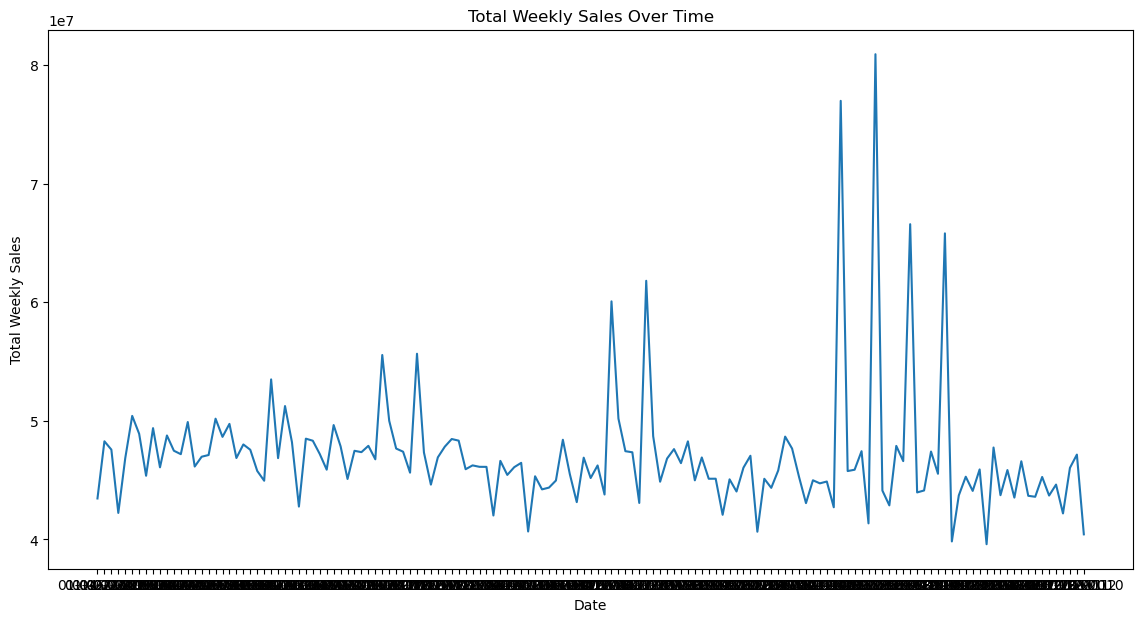

In [126]:
# Plot sales over time
plt.figure(figsize=(14, 7))
plt.plot(sales_over_time['Date'], sales_over_time['Weekly_Sales'])
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

# Sales by Holiday_Flag

In [164]:
# Group by Unemployment to get total sales per Unemployment
sales_by_dept = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

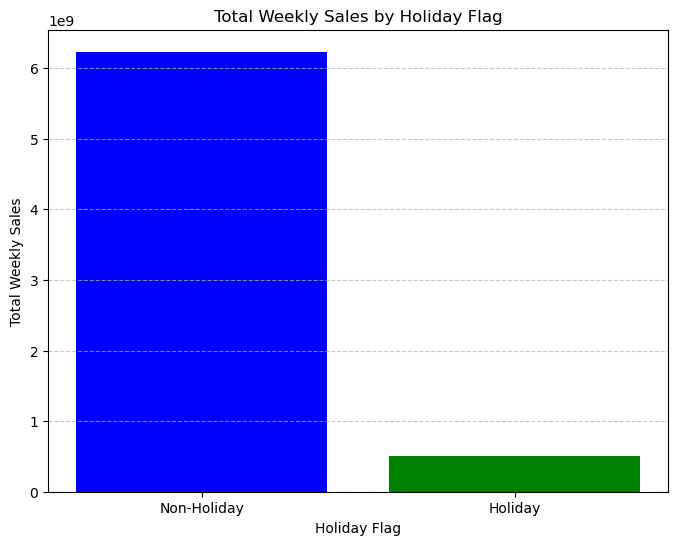

In [174]:
# Plot sales by Holiday_Flag and Non-Haliday_flag

plt.figure(figsize=(8, 6))
plt.bar(sales_by_flag['Holiday_Flag'], sales_by_flag['Weekly_Sales'], color=['blue', 'green'])
plt.xlabel('Holiday Flag')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales by Holiday Flag')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Sales by Store

In [138]:
# Group by store to get total sales per store
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

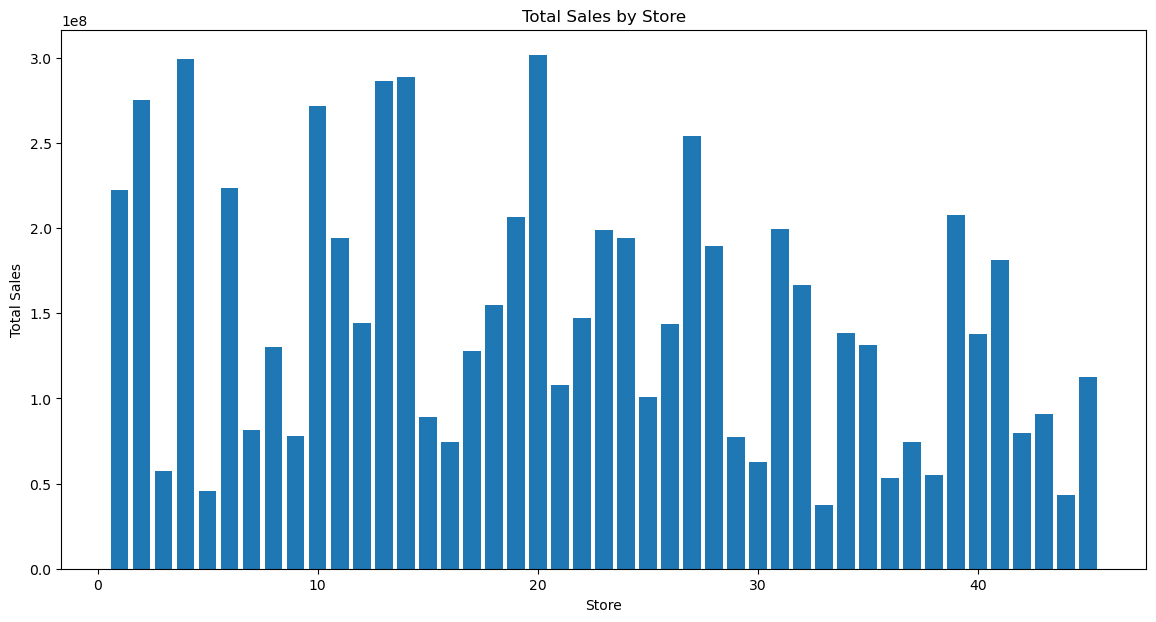

In [140]:
# Plot sales by store
plt.figure(figsize=(14, 7))
plt.bar(sales_by_store['Store'], sales_by_store['Weekly_Sales'])
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

# Advanced Visualization with Seaborn

# Sales Distribution by Store

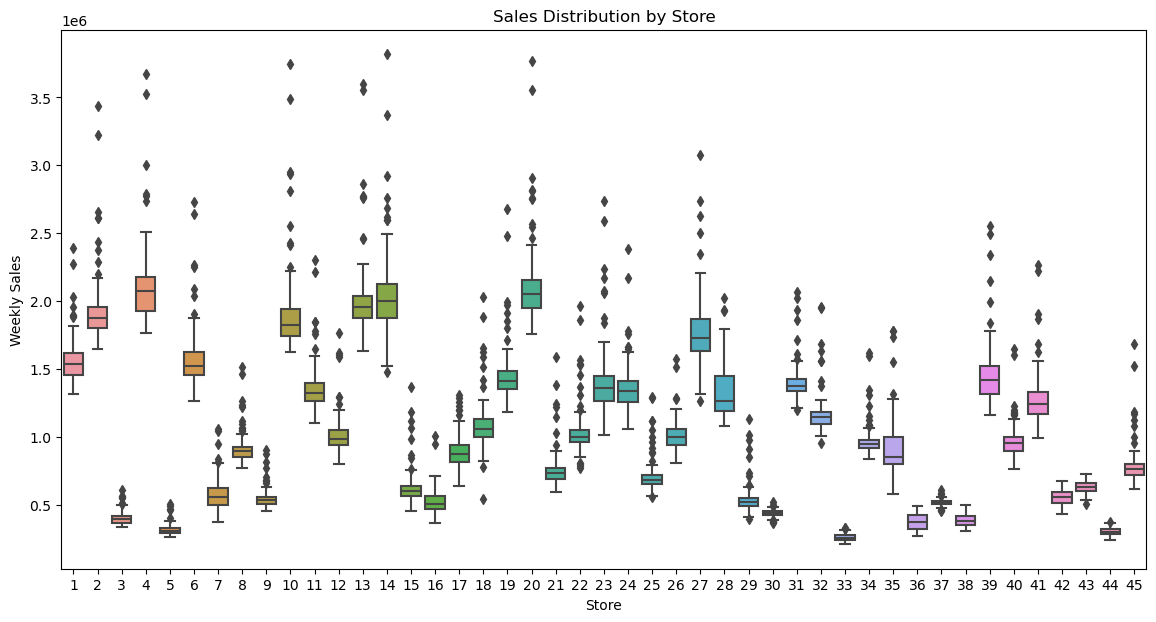

In [52]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Sales Distribution by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

In [28]:
# Group by store and calculate total weekly sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Determine store with highest sales
max_sales_store = store_sales.loc[store_sales['Weekly_Sales'].idxmax()]

# Determine store with lowest sales
min_sales_store = store_sales.loc[store_sales['Weekly_Sales'].idxmin()]

In [30]:
print(f"Highest sales store: Store {max_sales_store['Store']} with ${max_sales_store['Weekly_Sales']:.2f}")
print(f"Lowest sales store: Store {min_sales_store['Store']} with ${min_sales_store['Weekly_Sales']:.2f}")

Highest sales store: Store 20.0 with $301397792.46
Lowest sales store: Store 33.0 with $37160221.96


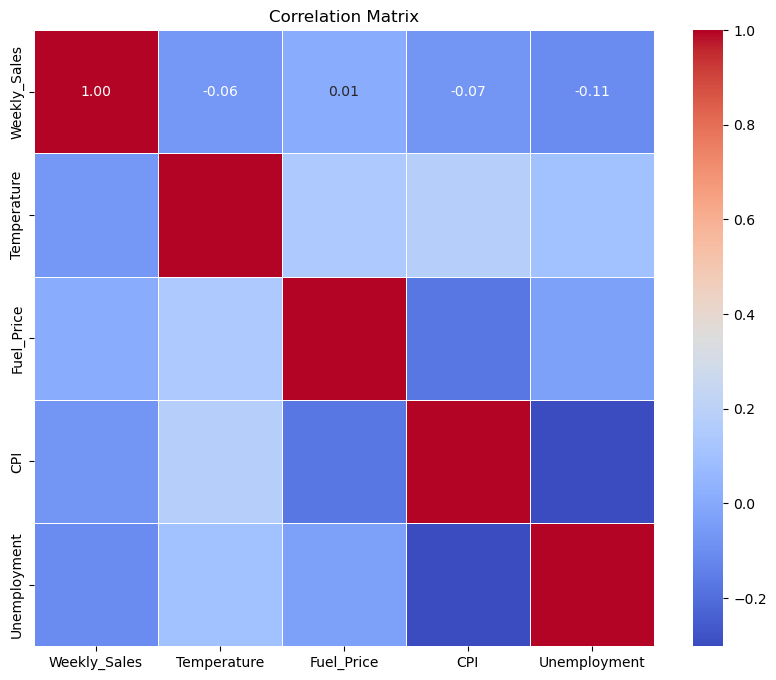

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [36]:
avg_sales_holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
print(f"Average weekly sales during holidays: ${avg_sales_holiday:.2f}")

Average weekly sales during holidays: $1122887.89


In [40]:
avg_sales_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
print(f"Average weekly sales during non-holidays: ${avg_sales_holiday:.2f}")

Average weekly sales during non-holidays: $1041256.38
